In [4]:
from google.colab import files
uploaded = files.upload()

Saving breathing_waveform_data.csv to breathing_waveform_data.csv


In [5]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['breathing_waveform_data.csv']))

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('breathing_waveform_data.csv')

In [2]:
# Examining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       26400 non-null  float64
 1   1       26400 non-null  float64
 2   2       26400 non-null  float64
 3   3       26400 non-null  float64
 4   4       26400 non-null  float64
 5   5       26400 non-null  float64
 6   6       26400 non-null  float64
 7   7       26400 non-null  float64
 8   8       26400 non-null  float64
 9   9       26400 non-null  float64
 10  10      26400 non-null  float64
 11  11      26400 non-null  float64
 12  12      26400 non-null  float64
 13  13      26400 non-null  float64
 14  14      26400 non-null  float64
 15  15      26400 non-null  float64
 16  16      26400 non-null  float64
 17  17      26400 non-null  float64
 18  18      26400 non-null  float64
 19  19      26400 non-null  float64
 20  20      26400 non-null  float64
 21  21      26400 non-null  float64
 22

In [3]:
# Counting each target
df.value_counts(['labels']).to_frame()

,0
labels,
normal,19734
quick,2667
hold,2133
deep,1066
deep_quick,800


In [4]:
# Drop rows with sum = 0

df['mean'] = df.iloc[:,:85].mean(axis=1)
df['sum'] = df.iloc[:,:85].sum(axis=1)
sum_0 = df[ (df['sum'] == 0)].index
df.drop(sum_0 , inplace=True)
# df.to_csv("updated.csv")

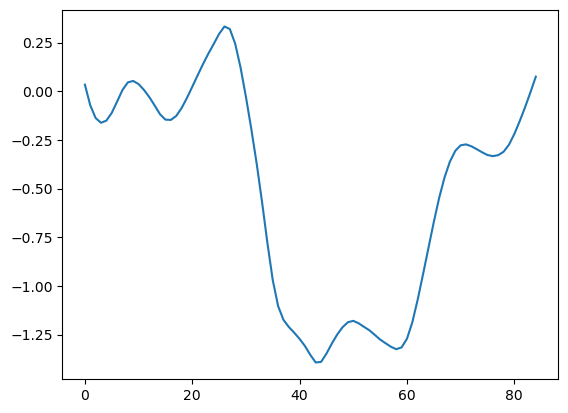

In [5]:
# Visualizing each row
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

array = df.iloc[:,:85]
array = array.to_numpy()
array_to_plot = array[500]
plt.plot(array_to_plot)

In [6]:
# Taking independent and dependent variables

from sklearn.model_selection import cross_val_score
import timeit

X = df.drop(columns=['labels', 'notes', 'mean', 'sum'])
y = df['labels']

In [7]:
# Creating model 1 using Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [12]:
# Creating model 2 using Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [17]:
# Creating model 3 using Naive Bayes

from sklearn import naive_bayes
model = naive_bayes.GaussianNB()

In [22]:
# Creating model 4 using Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier as gbc
model = gbc()

In [27]:
# Creating model 5 using SVM

from sklearn import svm
model = svm.SVC()

In [32]:
# Creating model 6 using MLP

from sklearn.neural_network import MLPClassifier as mlp
model = mlp()

In [33]:
# Validation: Train-test split

from sklearn.model_selection import train_test_split

start = timeit.default_timer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
end = timeit.default_timer()

print("time: ", end - start)
print("The score is: ", score)

time:  12.85984709999957
The score is:  0.879906723668869


C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# Cross-validation 1 using K-Folds

from sklearn.model_selection import KFold

start = timeit.default_timer()
skfold = KFold(n_splits = 10)
score = cross_val_score(model, X, y, cv = skfold)
score_mean = np.mean(score)
end = timeit.default_timer()

print("The scores are: ", score)
print("The mean score is: ", score_mean)
print("time: ", end - start)

C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_netw

The scores are:  [0.04780412 0.51340847 0.88340459 0.9424796  1.         0.96890789
 0.72706065 0.72472784 0.88297045 0.06726283]
The mean score is:  0.6758026436755904
time:  164.2148269999998


C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
# Cross-validation 2 using Stratified K-Folds

from sklearn.model_selection import StratifiedKFold

start = timeit.default_timer()
skfold = StratifiedKFold(n_splits = 10)
score = cross_val_score(model, X, y, cv = skfold)
score_mean = np.mean(score)
end = timeit.default_timer()

print("The scores are: ", score)
print("The mean score is: ", score_mean)
print("time: ", end - start)

C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_netw

The scores are:  [0.82432958 0.80606296 0.8169452  0.8321026  0.87135639 0.8736883
 0.7503888  0.67496112 0.73872473 0.76788491]
The mean score is:  0.7956444601463095
time:  165.0074880000002


C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Cross-validation 3 using LeaveOneOut

from sklearn.model_selection import LeaveOneOut

start = timeit.default_timer()
leave_validation = LeaveOneOut()
score = cross_val_score(model, X, y, cv = leave_validation)
score_mean = np.mean(score)
end = timeit.default_timer()

print("The mean score is: ", score_mean)
print("time: ", end - start)

In [36]:
# Cross-validation 4 using ShuffleSplit

from sklearn.model_selection import ShuffleSplit

start = timeit.default_timer()
shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.2)
score = cross_val_score(model, X, y, cv = shuffle_split)
score_mean = np.mean(score)
end = timeit.default_timer()

print("The scores are: ", score)
print("The mean score is: ", score_mean)
print("time: ", end - start)

C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_netw

The scores are:  [0.89137194 0.88437621 0.89273222 0.88029538 0.87874077 0.88262728
 0.88184998 0.87757482 0.87699184 0.88068403]
The mean score is:  0.8827244461717839
time:  145.69051260000015


C:\Users\IoT-Lab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
